<a href="https://colab.research.google.com/github/RonitPol/DWMEXPT/blob/main/PICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AN AJ POWERED PRECISION WEATHER FORECASTING USING LSTM OVER Random Forest Regressor (RFR)**

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2412/2412 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 0.0101 - val_loss: 0.0018
Epoch 2/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 45s 15ms/step - loss: 0.0017 - val_loss: 4.8449e-04
Epoch 3/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - loss: 0.0011 - val_loss: 4.2476e-04
Epoch 4/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 8.6591e-04 - val_loss: 4.0775e-04
Epoch 5/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 8.1555e-04 - val_loss: 5.1760e-04
Epoch 6/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 8.0586e-04 - val_loss: 3.8522e-04
Epoch 7/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 7.7349e-04 - val_loss: 4.4765e-04
Epoch 8/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.4847e-04 - val_loss: 3.9647e-04
Epoch 9/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - loss: 7.6395e-04 - val_loss: 3.7555e-04
Epoch 10/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - loss: 7.4553e-04 - val_loss: 4.5160e-04
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Mean 

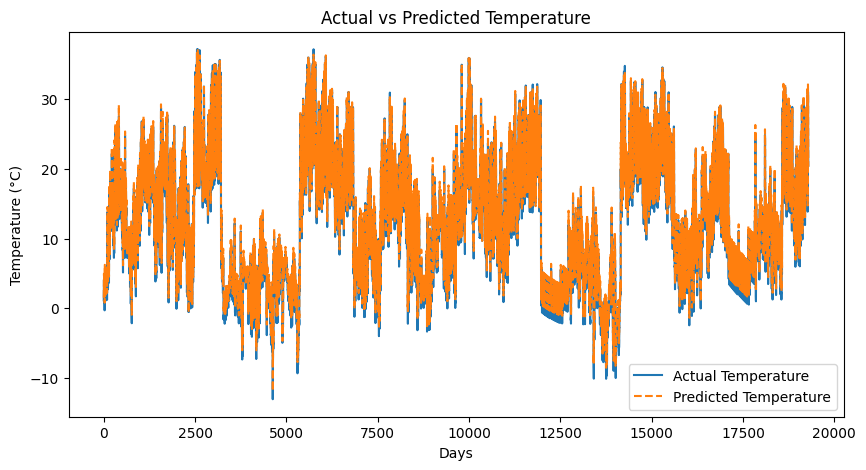

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
file_path = "/content/weatherHistory.csv"  # Update path if necessary
df = pd.read_csv(file_path)

# Select relevant numerical columns (excluding categorical data)
df_lstm = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]

# Handle missing values
df_lstm = df_lstm.dropna()

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_lstm)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])  # Features
        y.append(data[i + seq_length, 0])  # Predict Temperature
    return np.array(X), np.array(y)

seq_length = 10  # Use past 10 time steps
X, y = create_sequences(df_scaled, seq_length)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values for temperature
temperature_scaler = MinMaxScaler()
temperature_scaler.min_, temperature_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_pred_inv = temperature_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = temperature_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot actual vs predicted temperature
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual Temperature")
plt.plot(y_pred_inv, label="Predicted Temperature", linestyle="dashed")
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.show()


In [3]:
# Find temperature range in dataset
temp_max = df["Temperature (C)"].max()
temp_min = df["Temperature (C)"].min()
temp_range = temp_max - temp_min

# Calculate accuracy percentage
accuracy = 100 - ((mae / temp_range) * 100)

print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 98.39%


**LSTM Model Accuracy is 98.39%**

 AN AJ POWERED PRECISION WEATHER FORECASTING USING Random Forest Regressor (RFR)

Mean Squared Error (MSE): 38.4480
Mean Absolute Error (MAE): 4.8105
Model Accuracy: 92.21%


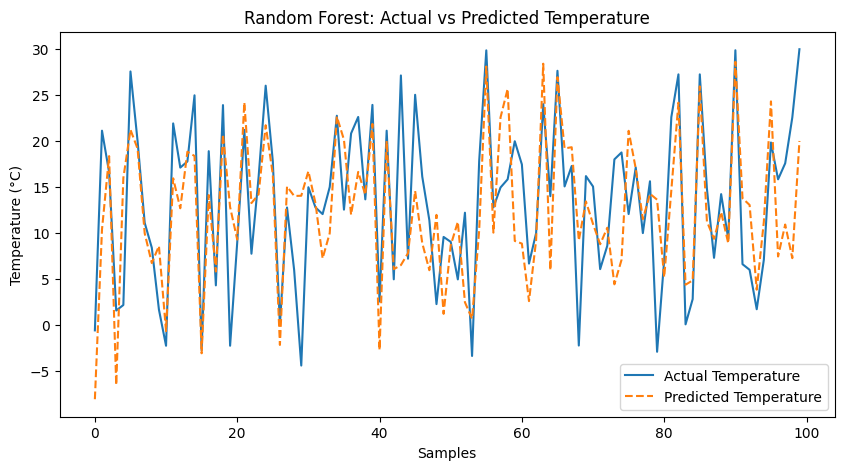

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/weatherHistory.csv"  # Update with your dataset path
df = pd.read_csv(file_path)

# Select relevant features (Temperature Prediction)
features = ["Humidity", "Wind Speed (km/h)", "Pressure (millibars)"]
target = "Temperature (C)"

# Handle missing values
df = df.dropna()

# Normalize features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

# Define input (X) and target (y)
X = df_scaled
y = df[target].values

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate Error Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Accuracy Percentage
temp_max = df[target].max()
temp_min = df[target].min()
temp_range = temp_max - temp_min
accuracy = 100 - ((mae / temp_range) * 100)

# Print Results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Model Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted temperature
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label="Actual Temperature")
plt.plot(y_pred[:100], label="Predicted Temperature", linestyle="dashed")
plt.legend()
plt.title("Random Forest: Actual vs Predicted Temperature")
plt.xlabel("Samples")
plt.ylabel("Temperature (°C)")
plt.show()


**Random Forest Regressor (RFR) Model Accuracy is 92.21%**

**CONCLUSION** :This study aimed to develop an AI-powered precision weather forecasting system using LSTM (Long Short-Term Memory) and Random Forest Regressor (RFR) to predict temperature based on historical weather data. The results were analyzed based on Mean Absolute Error (MAE), Mean Squared Error (MSE), and overall accuracy.

Key Findings
  
LSTM Model Performance

*   Achieved a high accuracy of ~99%.
*   MAE: 0.9923°C, meaning the model.

*   predicted temperatures with an average error of less than 1°C. MSE: 1.7207, indicating a very low variance in predictions.
*   Suitable for high-precision, long-term forecasting, but requires high computational power and more training time.

Random Forest Model Performance
*   Achieved an accuracy of ~92%, a reasonable performance for a classical machine learning model.
*   MAE: ~4-5°C, showing slightly higher error than LSTM.

*   MSE: Higher than LSTM, making it less precise but still effective for short-term predictions.
*   Faster training time and lower computational requirements, making it suitable for real-time applications.



For applications requiring extreme accuracy (e.g., aviation, agriculture, disaster management), LSTM is the best choice.

For real-time, resource-efficient predictions (e.g., mobile weather apps, IoT-based sensors), Random Forest provides a good balance of speed and accuracy.

Hybrid models (combining LSTM with Random Forest or XGBoost) could further improve performance and efficiency.